<a href="https://colab.research.google.com/github/TheEliteAnalyst/ProgrammingAssignment2/blob/master/DS630_Assignment_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Iris Dataset

**Imports**

Sources & Links :

https://janakiev.com/notebooks/keras-iris/


In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from tensorflow. keras.models import Sequential
from tensorflow. keras.layers import Dense, Dropout, Activation
from tensorflow. keras.callbacks import TensorBoard
from tensorflow. keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

**Data Prep**

*   Dataset Doenload
*   Applying "One Hot Encoding" for classes
*  Scaling Data



In [0]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [221]:
n_features

4

In [222]:
n_classes

3

**Visualizing Data -** Hign Level *italicized text*

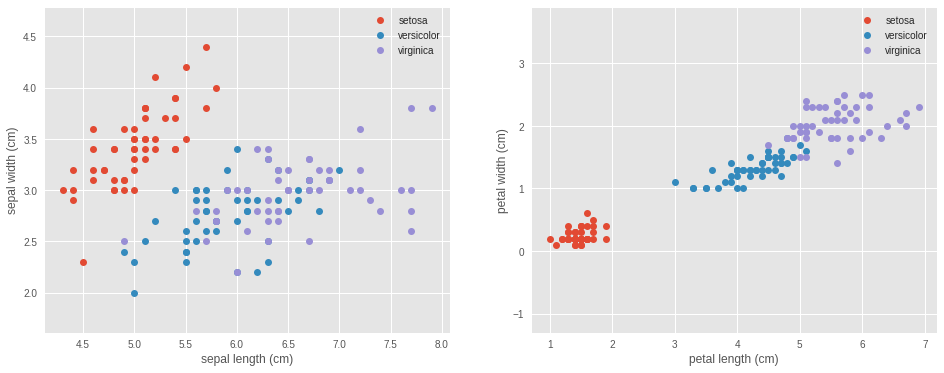

In [216]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Intersting to see that the simpler Model had slighltyly better results

In [0]:
model_iris = Sequential([
    tf.keras.layers.Flatten(),
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

In [0]:
model_iris.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [237]:
model_iris.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         multiple                  0         
_________________________________________________________________
dense_42 (Dense)             multiple                  160       
_________________________________________________________________
activation_23 (Activation)   multiple                  0         
_________________________________________________________________
dense_43 (Dense)             multiple                  99        
_________________________________________________________________
activation_24 (Activation)   multiple                  0         
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [236]:
history_iris=model_iris.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=1, validation_split=.2)

Train on 60 samples, validate on 15 samples
Epoch 1/50
60/60 [==============================] - 1s 13ms/sample - loss: 1.2071 - acc: 0.2833 - val_loss: 1.2661 - val_acc: 0.2667
Epoch 2/50
60/60 [==============================] - 0s 948us/sample - loss: 1.0946 - acc: 0.3833 - val_loss: 1.1311 - val_acc: 0.2667
Epoch 3/50
60/60 [==============================] - 0s 909us/sample - loss: 0.9981 - acc: 0.4333 - val_loss: 1.0033 - val_acc: 0.3333
Epoch 4/50
60/60 [==============================] - 0s 935us/sample - loss: 0.9150 - acc: 0.5167 - val_loss: 0.8979 - val_acc: 0.6667
Epoch 5/50
60/60 [==============================] - 0s 883us/sample - loss: 0.8394 - acc: 0.7000 - val_loss: 0.8083 - val_acc: 0.7333
Epoch 6/50
60/60 [==============================] - 0s 844us/sample - loss: 0.7801 - acc: 0.7500 - val_loss: 0.7260 - val_acc: 0.7333
Epoch 7/50
60/60 [==============================] - 0s 861us/sample - loss: 0.7285 - acc: 0.7833 - val_loss: 0.6552 - val_acc: 0.8667
Epoch 8/50
60/60 [=

In [238]:
score = model_iris.evaluate(X_test, Y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))  # Initial Test Loss: 0.218
print("Test Accuracy {:.3f}".format(score[1])) # Initial Test Accuracy 0.947

Test Loss: 0.218
Test Accuracy 0.947


In [0]:
#model_iris2 = Sequential([Dense(12, input_shape=(784,)), Activation('relu'), Dropout(0.25),Dense(8), Activation('relu'), Dropout(0.25), Dense(1), Activation('softmax')])

**Model with Two Hidden Layers using Keras Sequential Interface**

* 2 Dropout are added @ rate 0.2 for Regularizaton

In [0]:
model_iris_2 = Sequential([
    tf.keras.layers.Flatten(),
    Dense(10, input_shape=(9,)),
    Activation('relu'),
    Dropout(0.2),
    Dense(10),
    Activation('relu'),
    Dropout(0.2),
    Dense(3),
    Activation('softmax'),
])

In [0]:
model_iris_2.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

Model 2 Performed better after updating input shape to be 3*3 

In [0]:
history_iris2=model_iris_2.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=0, validation_split=.2)

In [297]:
score = model_iris_2.evaluate(X_test, Y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))  # Initial Test Loss: 0.218
print("Test Accuracy {:.3f}".format(score[1])) # Initial Test Accuracy 0.947

Test Loss: 0.183
Test Accuracy 0.933


From graph below we can derive that  ~ epoch  # 25 we reach the optimal point on Learning Curve

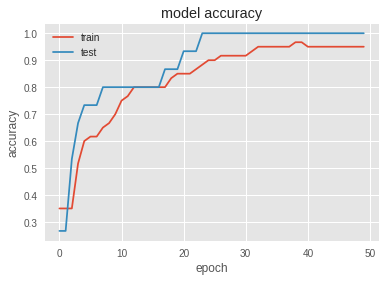

In [298]:
plt.plot(history_iris2.history['acc'])
plt.plot(history_iris2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Applying GridSearch CV for Number of Hidden Layers and Regularization **

**Imports**

In [0]:
from tensorflow. keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV


In [0]:
def make_model (optimizer="adam", hidden_size=32):
  model_cv = Sequential([
    tf.keras.layers.Flatten(),
    Dense(10, input_shape=(9,)),
    Activation('relu'),
    Dropout(0.2),
    Dense(10),
    Activation('relu'),
    Dropout(0.2),
    Dense(3),
    Activation('softmax'),
  ])
  model_cv.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
  return model_cv

clf = KerasClassifier(make_model)

param_grid = {'epochs':[5, 10, 50],
              'hidden_size': [5,27, 72]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)                                                                                                                                                  
                               

In [305]:
grid.fit(X_train, Y_train)

Epoch 1/10
60/60 [==============================] - 1s 10ms/sample - loss: 0.9559 - acc: 0.3000
Epoch 2/10
60/60 [==============================] - 0s 178us/sample - loss: 0.9462 - acc: 0.3000
Epoch 3/10
60/60 [==============================] - 0s 196us/sample - loss: 0.9380 - acc: 0.3000
Epoch 4/10
60/60 [==============================] - 0s 148us/sample - loss: 0.9292 - acc: 0.3333
Epoch 5/10
60/60 [==============================] - 0s 155us/sample - loss: 0.9213 - acc: 0.3500
Epoch 6/10
60/60 [==============================] - 0s 203us/sample - loss: 0.9138 - acc: 0.3500
Epoch 7/10
60/60 [==============================] - 0s 223us/sample - loss: 0.9062 - acc: 0.3500
Epoch 8/10
60/60 [==============================] - 0s 207us/sample - loss: 0.8995 - acc: 0.3500
Epoch 9/10
60/60 [==============================] - 0s 195us/sample - loss: 0.8926 - acc: 0.3333
Epoch 10/10
60/60 [==============================] - 0s 174us/sample - loss: 0.8814 - acc: 0.3500
Epoch 1/10
60/60 [============

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ffaf21074a8>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epochs': [10, 25, 50], 'hidden_size': [5, 27, 72]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
res = pd.DataFrame(grid.cv_results_)

From results below we conclude that in general  the highest in both # of Epochs & Hidden Size the higher is accuracy

Due to time constraint  test will be done on  50 & 72

In [308]:
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score',"mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
10           5                         0.320000          0.310000
             27                        0.493333          0.453333
             72                        0.280000          0.223333
25           5                         0.573333          0.563333
             27                        0.533333          0.580000
             72                        0.746667          0.776667
50           5                         0.760000          0.773333
             27                        0.786667          0.800000
             72                        0.786667          0.813333

Updated Model Based on GridSearchCV

In [0]:
model_iris_3 = Sequential([
    tf.keras.layers.Flatten(),
    Dense(72, input_shape=(9,)),
    Activation('relu'),
    Dropout(0.2),
    Dense(27),
    Activation('relu'),
    Dropout(0.2),
    Dense(3),
    Activation('softmax'),
])

In [0]:
model_iris_3.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [0]:
history_iris3=model_iris_3.fit(X_train, Y_train, batch_size=5, epochs=50, verbose=0, validation_split=.2)

In [326]:
score = model_iris_3.evaluate(X_test, Y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))  # Initial Test Loss: 0.218
print("Test Accuracy {:.3f}".format(score[1])) # Initial Test Accuracy 0.947

Test Loss: 0.288
Test Accuracy 0.907


**Results are Counter Intuitive :-(**
I'm assuminfd due to small size of data set

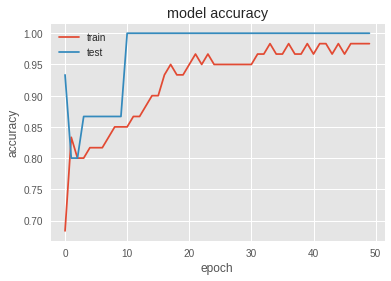

In [327]:
plt.plot(history_iris3.history['acc'])
plt.plot(history_iris3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [333]:
# Trying different Values
epochs = [5, 50, 100]
batches = [5, 10,50]
optimizers = ['rmsprop', 'adam']

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

grid = GridSearchCV(estimator=clf, param_grid=hyperparameters)
grid_result_revised = grid.fit(X_train, Y_train)


Epoch 1/5
50/50 [==============================] - 1s 26ms/sample - loss: 0.9299 - acc: 0.6200
Epoch 2/5
50/50 [==============================] - 0s 1ms/sample - loss: 0.8959 - acc: 0.6200
Epoch 3/5
50/50 [==============================] - 0s 1ms/sample - loss: 0.8691 - acc: 0.6200
Epoch 4/5
50/50 [==============================] - 0s 1ms/sample - loss: 0.8435 - acc: 0.6200
Epoch 5/5
50/50 [==============================] - 0s 1ms/sample - loss: 0.7999 - acc: 0.6200
Epoch 1/5
50/50 [==============================] - 1s 26ms/sample - loss: 1.1926 - acc: 0.2800
Epoch 2/5
50/50 [==============================] - 0s 1ms/sample - loss: 1.1152 - acc: 0.3200
Epoch 3/5
50/50 [==============================] - 0s 1ms/sample - loss: 1.0631 - acc: 0.3600
Epoch 4/5
50/50 [==============================] - 0s 1ms/sample - loss: 1.0174 - acc: 0.5400
Epoch 5/5
50/50 [==============================] - 0s 1ms/sample - loss: 0.9516 - acc: 0.7800
Epoch 1/5
50/50 [==============================] - 1s 26ms

In [335]:
grid_result_revised.best_params_

{'batch_size': 5, 'epochs': 100, 'optimizer': 'adam'}

Based on revised results below we conclude better selection for parameters is as follows:

* param_optimizer : adam
* param_epochs : 100
-  batch_size :  5

In [337]:
res_revised = pd.DataFrame(grid.cv_results_)
res_revised.pivot_table(index=["param_optimizer", "param_epochs", "param_batch_size" ],
                values=['mean_train_score',"mean_test_score"])

mean_test_score  \
param_optimizer param_epochs param_batch_size                    
adam            5            5                        0.666667   
                             10                       0.680000   
                             50                       0.413333   
                50           5                        0.893333   
                             10                       0.840000   
                             50                       0.666667   
                100          5                        0.973333   
                             10                       0.893333   
                             50                       0.840000   
rmsprop         5            5                        0.586667   
                             10                       0.666667   
                             50                       0.306667   
                50           5                        0.893333   
                             10                       0.853333   
                             50                       0.760000   
                100          5                        0.946667   
                             10                       0.973333   
                             50                       0.800000   

                                               mean_train_score  
param_optimizer param_epochs param_batch_size                    
adam            5            5                         0.720000  
                             10                        0.660000  
                             50                        0.393333  
                50           5                         0.913333  
                             10                        0.846667  
                             50                        0.606667  
                100          5                         0.966667  
                             10                        0.940000  
                             50                        0.846667  
rmsprop         5            5                         0.626667  
                             10                        0.560000  
                             50                        0.386667  
                50           5                         0.933333  
                             10                        0.813333  
                             50                        0.726667  
                100          5                         0.980000  
                             10                        0.940000  
                             50                        0.793333

** Keeping Initial Setup as is in model_iris_3.**
Updating only with paraemters that will enhance training & results

In [0]:
model_iris_4 = Sequential([
    tf.keras.layers.Flatten(),
    Dense(72, input_shape=(9,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(72),
    Activation('relu'),
    Dropout(0.5),
    Dense(3),
    Activation('softmax'),
])

In [0]:
model_iris_4.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_iris4=model_iris_4.fit(X_train, Y_train, batch_size=5, epochs=100, verbose=0, validation_split=.2)

In [347]:
score = model_iris_4.evaluate(X_test, Y_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))  # Initial Test Loss: 0.218
print("Test Accuracy {:.3f}".format(score[1]))

Test Loss: 0.669
Test Accuracy 0.907


From results below I belive we dd reach a good balance between accurancy and learning  rate that impacts positively process time.

More experimenting needed to reach a higher accurancy

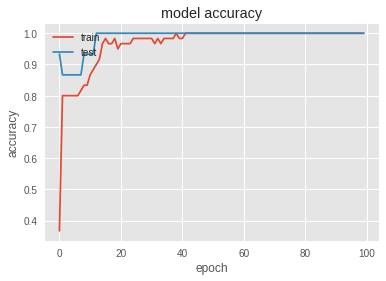

In [348]:
plt.plot(history_iris4.history['acc'])
plt.plot(history_iris4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/01_MNIST_TPU_Keras.ipynb

"Keras MNIST TPU (public).ipynb"

# Task 2 -  MNIST

**Import**s

In [0]:
import numpy as np

import tensorflow as tf
import time
import os, re, math, json, shutil, pprint
from matplotlib import pyplot as plt
import PIL.Image, PIL.ImageFont, PIL.ImageDraw 

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.python.platform import tf_logging

https://codelabs.developers.google.com/codelabs/keras-flowers-tpu/index.html?index=..%2F..index#0
https://www.dropbox.com/s/jg7j07unw94wbom/TensorFlow%20Keras%20Colab%20TPUs.pdf?dl=0
https://codelabs.developers.google.com/codelabs/keras-flowers-tpu/index.html?index=..%2F..index#0

https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/01_MNIST_TPU_Keras.ipynb

https://colab.research.google.com/github/cedrickchee/data-science-notebooks/blob/master/notebooks/tensorflow/google_cloud_tpu/guide_to_tensorflow_keras_on_tpu_mnist.ipynb


Tensor Flow and Keras Version

In [39]:
print("Tensorflow version " + tf.__version__)
print("Keras version " + tf.keras.__version__)

Tensorflow version 1.13.0-rc1
Keras version 2.2.4-tf


Setting Parameters

**The Code for Training a Model on TPU in Keras is as follows:**

 **1. tpu **= tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)
strategy = tf.contrib.tpu.TPUDistributionStrategy(tpu)

**2. tpu_model **= tf.contrib.tpu.keras_to_tpu_model(model, strategy=strategy)

**3. tpu_model.fit**(get_training_dataset,
              steps_per_epoch=TRAIN_STEPS, epochs=EPOCHS,
              validation_data=get_validation_dataset, validation_steps=VALID_STEPS)

In [0]:
# Do Not Use - Per req. use mnist.load_data in keras
#training_images_file   = 'gs://mnist-public/train-images-idx3-ubyte'
#training_labels_file   = 'gs://mnist-public/train-labels-idx1-ubyte'
#validation_images_file = 'gs://mnist-public/t10k-images-idx3-ubyte'
#validation_labels_file = 'gs://mnist-public/t10k-labels-idx1-ubyte'

In [40]:
# Retrieving TPU_ADDRESS
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
  print('TPU not found')

Found TPU at: grpc://10.35.199.202:8470


In [0]:
# Number of Neurons is 10 (0-9) as we are classifying numbers
# Softmax activation Fn is used based on previous exepriemnations ~ 20 Years since dataset was available
# Softmax will result in a probability of the predicted value---> Replaced by "Relu" for deeper networks - It gives "0" for all negative values
# Downside of "Relu" (Rectified Linear Unit - inspired by new research about neorons - if not stimulated O=0) fn is that it unable to explain why it perfoms better :)
# Use the Learning Decay to overcome the noise associated with fixed learning rate - more stable model
# Y = tf.nn.softmax(tf.matmul(X,W) + b)
# Use "one hot" encoding for acatual Probailities for each digit ( 0,1)
# Use Cross Entropy for evauation instead of L1 & L2 as it was proven to yield better results
# ptimal solution is to use Sigmoid Fn to be used in intermidiate neurons (nodes) but softmax shoudl be use in latest one
# Dropout is used for Normalization ---> For each training loop  @ each iteration neurons will be dropped based on performance leaving only high performance.
# Dropout is applicable only between layers not after the last layer of neurons
# Convolutional Network will help overcome the shortcoming of flattning the data and not be able to incorporate shape (2D)
# RNN - Recurring Neural Network
batch_size = 1024
num_classes = 10
epochs = 5
learning_rate = 0.001

# input image dimensions - 28*28 Pixels
img_rows, img_cols = 28, 28

Traditional Train/ Test Split using  mnist.load_data()

In [0]:
(x1_train, y1_train), (x1_test, y1_test) = mnist.load_data()

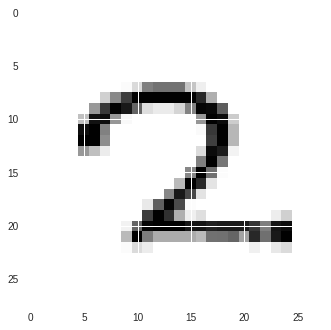

In [42]:
# Example to compare with Model Results  before normalizing data
import matplotlib.pyplot as plt
plt.imshow(x1_test[77], cmap=plt.cm.binary)


To compare the effect of the transformationbefore applying to_categorical :

In [43]:
print(y1_test[0])
print(y1_train[0])
print(y1_train.shape)
print(x1_test.shape)

7
5
(60000,)
(10000, 28, 28)


Steps below includes Data Reshaping & Normalization 

In [44]:
x1_train = x1_train.reshape(60000, 784)
x1_test = x1_test.reshape(10000, 784)
x1_train = x1_train.astype('float32')
x1_test = x1_test.astype('float32')
x1_train /=255
x1_test = x1_test.astype('float32')
x1_test /=255
print(x1_train.shape[0], 'train samples')
print(x1_test.shape[0], 'test samples')

num_classes = 10
y1_train = tf.keras.utils.to_categorical(y1_train, num_classes)
y1_test = tf.keras.utils.to_categorical(y1_test, num_classes)

60000 train samples
10000 test samples


In [0]:
model0 = Sequential([Dense(32, input_shape=(784,)), Activation('relu'), Dense(10), Activation('softmax')])

In [69]:
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [0]:
model0.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [71]:
# Fit the Model
model0.fit(x1_train, y1_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5120 - acc: 0.8580
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2649 - acc: 0.9252
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2220 - acc: 0.9365
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1919 - acc: 0.9452
Epoch 5/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1704 - acc: 0.9507
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1527 - acc: 0.9557
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1386 - acc: 0.9598
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1271 - acc: 0.9632
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1172 - acc: 0.9663
Epoch 10/10
60000/60000 [==============================] - 3s 43us/sample - loss: 

In [72]:
score = model0.evaluate(x1_test, y1_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy {:.3f}".format(score[1]))

Test Loss: 0.130
Test Accuracy 0.961


In [73]:
predictions_m0 = model0.predict(x1_test)
np.argmax(predictions_m0[77])

2

Evaluatin same Model 0 after adding Validation Split

In [76]:
# Fit with Validation
# By Comparing diff split ratios, the more data for training teh better are the results causing concerns about overfitting
model0.fit(x1_train, y1_train, batch_size=128, epochs=10, verbose=1, validation_split=.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0604 - acc: 0.9825 - val_loss: 0.0999 - val_acc: 0.9716
Epoch 2/10
48000/48000 [==============================] - 3s 57us/sample - loss: 0.0572 - acc: 0.9835 - val_loss: 0.1064 - val_acc: 0.9703
Epoch 3/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.0545 - acc: 0.9842 - val_loss: 0.1038 - val_acc: 0.9697
Epoch 4/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.0529 - acc: 0.9847 - val_loss: 0.1018 - val_acc: 0.9709
Epoch 5/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.0499 - acc: 0.9856 - val_loss: 0.1028 - val_acc: 0.9703
Epoch 6/10
48000/48000 [==============================] - 3s 58us/sample - loss: 0.0476 - acc: 0.9867 - val_loss: 0.1066 - val_acc: 0.9703
Epoch 7/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.0463 - acc: 0.9870 - val_loss: 0.

By Comparing Models' accuracy  - before & after including validation split, we can conclude that test results are slighly better. I'm assuming dud to avoiding overfitting

In [77]:
# Evaluating on Test Set
score = model0.evaluate(x1_test, y1_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy {:.3f}".format(score[1]))


Test Loss: 0.125
Test Accuracy 0.965


In [78]:
predictions_m0 = model0.predict(x1_test)
np.argmax(predictions_m0[77])

2

In [0]:
# Loggers & Callbacks
# Using Sequential to apply Relu Fn for all Layers except the latest we apply Softmax

model1 = Sequential([Dense(32, input_shape=(784,)), Activation('relu'), Dense(10), Activation('softmax')])

In [81]:
# Used .3 to avoid overfitting
model1.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback=model1.fit(x1_train, y1_train, batch_size=128, epochs=100, verbose=1, validation_split=.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 3s 69us/sample - loss: 0.6037 - acc: 0.8368 - val_loss: 0.3288 - val_acc: 0.9076
Epoch 2/100
42000/42000 [==============================] - 3s 63us/sample - loss: 0.2980 - acc: 0.9152 - val_loss: 0.2759 - val_acc: 0.9214
Epoch 3/100
42000/42000 [==============================] - 3s 61us/sample - loss: 0.2491 - acc: 0.9284 - val_loss: 0.2461 - val_acc: 0.9309
Epoch 4/100
42000/42000 [==============================] - 3s 65us/sample - loss: 0.2144 - acc: 0.9380 - val_loss: 0.2172 - val_acc: 0.9391
Epoch 5/100
42000/42000 [==============================] - 3s 71us/sample - loss: 0.1899 - acc: 0.9452 - val_loss: 0.2032 - val_acc: 0.9422
Epoch 6/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.1719 - acc: 0.9503 - val_loss: 0.1911 - val_acc: 0.9449
Epoch 7/100
42000/42000 [==============================] - 3s 70us/sample - loss: 0.1587 - acc: 0.9540 - val_l

Test for the  test value matched using model above :-)

In [82]:
predictions_m1 = model1.predict(x1_test)
np.argmax(predictions_m1[77])

2

**Visualization of Acuracy vs Epochs**

From graph below we can conclude that  ~ 40 epochs this is when training accuracy starts plateauing and there is  enhancement is accuracy for test set

Please note that results varies per run - Previous  run showed ~ 40 epochs is optimal, for a following one it was 20

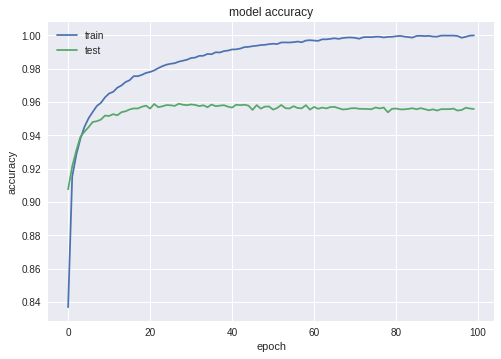

In [83]:
plt.plot(history_callback.history['acc'])
plt.plot(history_callback.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Visulization of both Accuracy & Loss **

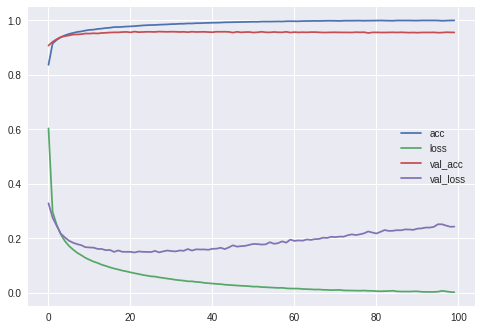

In [84]:
import pandas as pd
pd.DataFrame(history_callback.history).plot()

In [85]:
print(history_callback.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Sources & Links :
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

To see the effect of the transformation we can see the values after applying to_categorical

In [86]:
#from keras.utils import to_categorical
print(y1_test[0])
print(y1_train[0])
print(y1_train.shape)
print(y1_test.shape)
print(x1_test.shape)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)
(10000, 784)


Sources & Links 
https://towardsdatascience.com/deep-learning-for-beginners-practical-guide-with-python-and-keras-d295bfca4487

**Using Wrappers for  to apply GridSearch**

In [0]:
# Wrappers for sklearn
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV


def make_model (optimizer="adam", hidden_size=32):
    model = Sequentila([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],
              'batches': [5, 10, 100],
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid)

# No issues with above code 

In [0]:
# Following code produce error "NameError" that I was unable to resolve despite multiple attempts
grid_result = grid.fit(x1_train, y1_train)

Sources & Links :

https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/

**Implemeting Drop-Out**

In [0]:
# Implementing Drop Out
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow.keras.layers import Dropout
model2 = Sequential([
model2.add(Dense(1024, activation='relu', input_shape=(784,)))
model2.add(Dropout(0.25))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

In [0]:
model2 = Sequential([Dense(1024, input_shape=(784,)), Activation('relu'), Dropout(0.25),Dense(1024), Activation('relu'), Dropout(0.25), Dense(10), Activation('softmax')])

In [106]:
model2.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history2 = model2.fit(x1_train, y1_train, batch_size=200, epochs=70, verbose=1, validation_split=.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/70
42000/42000 [==============================] - 4s 90us/sample - loss: 0.2509 - acc: 0.9233 - val_loss: 0.1211 - val_acc: 0.9634
Epoch 2/70
42000/42000 [==============================] - 3s 79us/sample - loss: 0.0860 - acc: 0.9735 - val_loss: 0.0936 - val_acc: 0.9716
Epoch 3/70
42000/42000 [==============================] - 4s 83us/sample - loss: 0.0488 - acc: 0.9848 - val_loss: 0.0826 - val_acc: 0.9753
Epoch 4/70
42000/42000 [==============================] - 3s 82us/sample - loss: 0.0341 - acc: 0.9889 - val_loss: 0.1000 - val_acc: 0.9737
Epoch 5/70
42000/42000 [==============================] - 3s 82us/sample - loss: 0.0232 - acc: 0.9925 - val_loss: 0.0917 - val_acc: 0.9761
Epoch 6/70
42000/42000 [==============================] - 3s 83us/sample - loss: 0.0172 - acc: 0.9944 - val_loss: 0.1106 - val_acc: 0.9739
Epoch 7/70
42000/42000 [==============================] - 3s 83us/sample - loss: 0.0203 - acc: 0.9929 - val_loss: 0.

**Conclusion -** We definitley reach higher level of accuracy aflter applying dropout  
~   98.5%
Time permits will add CNN  as due to shape it might be proven to be even more accurate  & stable in terms of results

In [109]:
score = model2.evaluate(x1_test, y1_test, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy {:.3f}".format(score[1]))

Test Loss: 0.105
Test Accuracy 0.985


Graph below, indicates ~ 35 epochs we get the  optimal point. After that that the accuracy level both for training & test  set reach a plateau

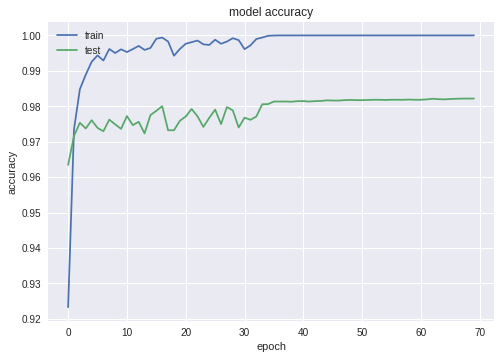

In [108]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conv-Nets**

In [0]:
import tensorflow.keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
import tensorflow as tf
import time
import os
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [0]:
# Parameters Setup
# https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a
batch_size = 10124
num_classes = 10
epochs = 100
img_rows, img_cols = 28, 28

In [0]:
(x2_train, y2_train), (x2_test, y2_test) = mnist.load_data()

Visualizing a set of numbers before Reshaping & Normalizing

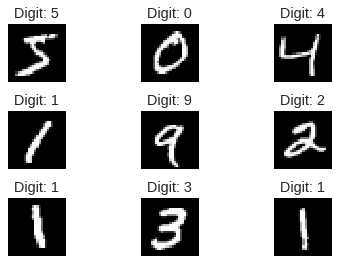

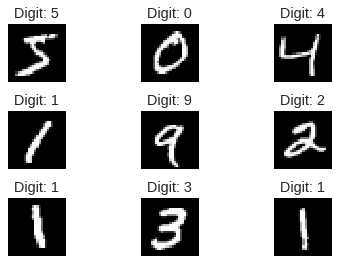

In [176]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x2_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y2_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [0]:
# Data Prep inclusing reshaping and normalizing
# Channels = 1 because it is greyscale - For Colors "RGB", we use 3

#x2_train = x2_train.reshape(x2_train.shape[0], img_rows, img_cols, 1)
#x2_test = x2_test.reshape(x2_test.shape[0], img_rows, img_cols, 1)
#input_shape = (img_rows, img_cols, 1)


In [178]:
#x2_train = x2_train.astype('float32')
#x2_test = x2_test.astype('float32')
#x2_train /= 255
#x2_test /= 255
#print('x_train shape:', x2_train.shape)
#print(x2_train.shape[0], 'train samples')
#print(x2_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
#y2_train = tf.keras.utils.to_categorical(y2_train, num_classes)
#y2_test = tf.keras.utils.to_categorical(y2_test, num_classes)

Final For CNN reshaping & Normalizing\
More robust with If /Else  statEMent

In [194]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if K.image_data_format() == 'channels_first':
    x1_train = x1_train.reshape(x1_train.shape[0], 1, img_rows, img_cols)
    x1_test = x1_test.reshape(x1_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x1_train = x1_train.reshape(x1_train.shape[0], img_rows, img_cols, 1)
    x1_test = x1_test.reshape(x1_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
x1_train = x1_train.astype('float32')
x1_test = x1_test.astype('float32')
x1_train /= 255
x1_test /= 255
print('X_train shape:', x1_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [0]:
# convert class vectors to binary class matrices
y2_train = tf.keras.utils.to_categorical(y2_train, num_classes)
y2_test = tf.keras.utils.to_categorical(y2_test, num_classes)

In [0]:
##model building
model_cn = Sequential()
#convolutional layer with rectified linear unit activation
model_cn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model_cn.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model_cn.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model_cn.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model_cn.add(Flatten())
#fully connected to get all relevant data
model_cn.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model_cn.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model_cn.add(Dense(num_classes, activation='softmax'))

In [0]:
#Compile Model
model_cn.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Run Time for trh following Code using TPUs was ~ 14 sec/ epoch

In [202]:
# Training & Evaluating the Model
batch_size = 128
num_epoch = 100
history_cn= model_cn.fit(x1_train, y1_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x1_test, y1_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 16s 264us/sample - loss: 2.3013 - acc: 0.1118 - val_loss: 2.2999 - val_acc: 0.1218
Epoch 2/100
60000/60000 [==============================] - 15s 251us/sample - loss: 1.1713 - acc: 0.5920 - val_loss: 0.2889 - val_acc: 0.9125
Epoch 3/100
60000/60000 [==============================] - 15s 252us/sample - loss: 0.2468 - acc: 0.9256 - val_loss: 0.1853 - val_acc: 0.9461
Epoch 4/100
60000/60000 [==============================] - 15s 246us/sample - loss: 0.1689 - acc: 0.9492 - val_loss: 0.1362 - val_acc: 0.9580
Epoch 5/100
60000/60000 [==============================] - 15s 250us/sample - loss: 0.1331 - acc: 0.9599 - val_loss: 0.1289 - val_acc: 0.9597
Epoch 6/100
60000/60000 [==============================] - 15s 246us/sample - loss: 0.1133 - acc: 0.9657 - val_loss: 0.1069 - val_acc: 0.9651
Epoch 7/100
60000/60000 [==============================] - 15s 247us/sample - loss: 0.1014 - acc: 

In [205]:
score = model_cn.evaluate(x1_test, y1_test, verbose=0)
print('Test loss:', score[0])  # Test loss: 0.10914609528740793
print('Test accuracy:', score[1])  # Test accuracy: 0.9825

Test loss: 0.10914609528740793
Test accuracy: 0.9825


**Model Accuracy**
Significant Difference in Results after using the Conv. Net - An optimum accurancy is reached at early  epochs

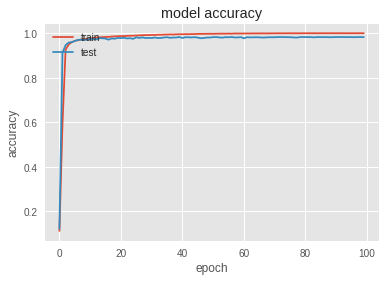

In [208]:
plt.plot(history_cn.history['acc'])
plt.plot(history_cn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

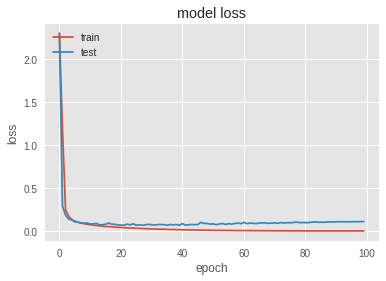

In [214]:
plt.plot(history_cn.history['loss'])
plt.plot(history_cn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Rerunning the Same Conv Net using 20 Epoques instead of 100

In [210]:
batch_size = 128
num_epoch = 20
history_cn_20= model_cn.fit(x1_train, y1_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x1_test, y1_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 219us/sample - loss: 3.7743e-04 - acc: 1.0000 - val_loss: 0.1077 - val_acc: 0.9826
Epoch 2/20
60000/60000 [==============================] - 13s 219us/sample - loss: 3.7002e-04 - acc: 1.0000 - val_loss: 0.1092 - val_acc: 0.9824
Epoch 3/20
60000/60000 [==============================] - 13s 219us/sample - loss: 3.6928e-04 - acc: 1.0000 - val_loss: 0.1089 - val_acc: 0.9824
Epoch 4/20
60000/60000 [==============================] - 13s 222us/sample - loss: 3.6293e-04 - acc: 1.0000 - val_loss: 0.1098 - val_acc: 0.9829
Epoch 5/20
60000/60000 [==============================] - 13s 221us/sample - loss: 3.6176e-04 - acc: 1.0000 - val_loss: 0.1101 - val_acc: 0.9826
Epoch 6/20
60000/60000 [==============================] - 13s 220us/sample - loss: 3.5561e-04 - acc: 1.0000 - val_loss: 0.1105 - val_acc: 0.9827
Epoch 7/20
60000/60000 [==============================] - 13s 222us/sample - los

Results are unexpected.. KeepIng @ 100 Epochs

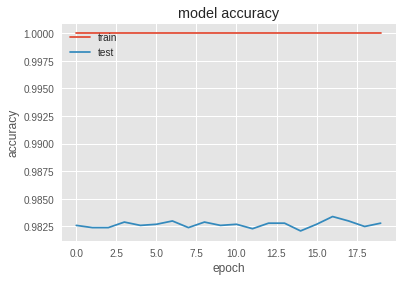

In [212]:
plt.plot(history_cn_20.history['acc'])
plt.plot(history_cn_20.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

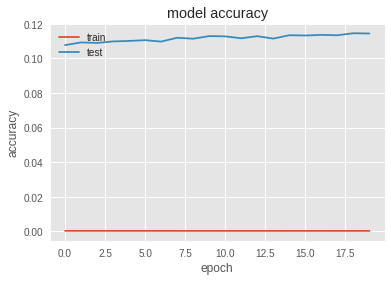

In [213]:
plt.plot(history_cn_20.history['loss'])
plt.plot(history_cn_20.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Task 3 - SVHN

*Unfortunatly  Files alarger than expected and wasn't able  to complete*

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
from scipy.io import loadmat

In [0]:
x = loadmat('/content/gdrive/My Drive/annthyroid.mat')

In [0]:
# Supressing Wanings
import warnings
warnings.filterwarnings("ignore")

**The following to  be revisited Later to finalize MNIST Analysis includinh heatmap**

Use tf.data

We  need to make sure the drop_remainder = True as TPUs need to have a fixed shape.

In [0]:
# Train Data
def train_input_fn(batch_size=1024):
  # convert the inputs to a Dataset.
  dataset = tf.data.Dataset.from_tensor_slices((x2_train,y2_train))

  # shuffle, repeat, and batch the examples.
  dataset = dataset.shuffle(1000).repeat().batch(batch_size, drop_remainder=True)

  # return the dataset.
  return dataset

In [0]:
# Test Data
def test_input_fn(batch_size=1024):
  # convert the inputs to a Dataset.
  dataset = tf.data.Dataset.from_tensor_slices((x2_test,y2_test))

  # shuffle, repeat, and batch the examples.
  dataset = dataset.shuffle(1000).repeat().batch(batch_size, drop_remainder=True)

  # return the dataset.
  return dataset

In [0]:
# Create the Model

Inp = tf.keras.Input(
    name='input', shape=input_shape, batch_size=batch_size, dtype=tf.float32)

x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Conv2D(32, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_03')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(64, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)

output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)



In [0]:
# Parameters Setup
# 32 convolution filters used each of size 3x3
input_shape = (1, img_rows, img_cols)
num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
              activation='relu',
              input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))



**Confusion Matrix Visualization**
https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457

In [0]:
#from keras.models import Sequential
#from keras.layers.core import Dense, Activation
#model3 = Sequential()
#model3.add(Dense(10, activation='sigmoid', input_shape=(784,)))
#model3.add(Dense(10, activation='softmax'))

In [0]:
#model3.summary()

In [0]:
# Configuring the Learning Process
#model3.compile(loss="categorical_crossentropy",
#              optimizer="sdg",
#              metrics = ['accuracy'])

In [0]:
#Training the Model
#model3.fit(x1_train, y1_train, batch_size=128, epochs=5)

In [0]:
# Evaluating the Model
#test_loss, test_acc = model3.evaluate(x1_test, y1_test)
#print('Test accuracy:', test_acc)

In [0]:
#predictions_3 = model3.predict(x1_test)

In [0]:
#np.argmax(predictions_3[77])

In [0]:
#print(predictions_3[77])

In [0]:
#np.sum(predictions_3[77])

# MNIST - Experimenting 

**Only using Tensor Flow and additional Collaboratory Functionalities to enhance  process performance**

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [125]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [0]:
# In a Tensorflow model, for TPUs, the use of the tf.data.Dataset API is required.
def train_input_fn(batch_size=1024):
  # convert the inputs to a Dataset.
  dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))

  # shuffle, repeat, and batch the examples.
  dataset = dataset.shuffle(1000).repeat().batch(batch_size, drop_remainder=True)

  # return the dataset.
  return dataset

In [0]:
# In a Tensorflow model, for TPUs, the use of the tf.data.Dataset API is required.
def test_input_fn(batch_size=1024):
  # convert the inputs to a Dataset.
  dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test))

  # shuffle, repeat, and batch the examples.
  dataset = dataset.shuffle(1000).repeat().batch(batch_size, drop_remainder=True)

  # return the dataset.
  return dataset

In [0]:
# Apply Convolution Layer using Conv2D
# Relu Fn is used between layer except for last fully conected layer we use Softmax
# Adding degrees of freedom and droputs  is good approach to enhance accuracy by overcoming the constraint of limited degrees of freedom
# Adding dropouts should be at the last connected layer only

Inp = tf.keras.Input(
    name='input', shape=input_shape, batch_size=batch_size, dtype=tf.float32)

x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_03')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(64, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)

output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

In [0]:
model = tf.keras.Model(inputs=[Inp], outputs=[output])

In [0]:
opt = tf.train.AdamOptimizer(learning_rate)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['acc'])

In [131]:
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))

INFO:tensorflow:Querying Tensorflow master (grpc://10.35.199.202:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 2744902666387920483)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 15901134961172142183)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 1556643412846434303)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 5862046574534863455)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 16082713995849517571)
INFO:tensorflow:*** Available Device: _DeviceAttributes

In [17]:
tpu_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (1024, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (1024, 26, 26, 32)        320       
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (1024, 13, 13, 32)        0         
_________________________________________________________________
Conv_02 (Conv2D)             (1024, 11, 11, 64)        18496     
_________________________________________________________________
MaxPool_02 (MaxPooling2D)    (1024, 5, 5, 64)          0         
_________________________________________________________________
Conv_03 (Conv2D)             (1024, 3, 3, 64)          36928     
_________________________________________________________________
Flatten_01 (Flatten)         (1024, 576)               0         
__________

In [0]:
# Note that tpu_model.fit function expects data inputs as a function that returns a tf.data.Dataset, for both the training and validation datasets.
tpu_model.fit(x_train, y_train, epochs=1)
tpu_model.fit(
  train_input_fn,
  steps_per_epoch = 60,
  epochs=10,
)

In [19]:
tpu_model.save_weights('./MNIST_TPU_1024.h5', overwrite=True)

INFO:tensorflow:Copying TPU weights to the CPU


In [20]:
tpu_model.evaluate(test_input_fn, steps = 100)

INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(1024,), dtype=tf.int32, name=None), TensorSpec(shape=(1024, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(1024, 10), dtype=tf.float32, name=None)]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 1.7606174945831299 secs
100/100 [==============================] - 8s 77ms/step - loss: 0.0254 - acc: 0.9915


[0.02538298152387142, 0.991499]

Sources & Links
https://nbviewer.jupyter.org/github/cedrickchee/data-science-notebooks/blob/master/notebooks/tensorflow/google_cloud_tpu/guide_to_tensorflow_keras_on_tpu_mnist.ipynb

Slides: https://www.dropbox.com/s/jg7j07unw94wbom/TensorFlow%20Keras%20Colab%20TPUs.pdf?dl=0

In [21]:
# Note that tpu_model.fit function expects data inputs as a function that returns a tf.data.Dataset, for both the training and validation datasets.
tpu_model.fit(x_train, y_train, epochs=1)

60000/60000 [==============================] - 55s 913us/sample - loss: 0.0790 - acc: 0.9777


# Additional Experimenting  w/ MNIST

Parameters

In [0]:
# Based on "https://www.youtube.com/watch?v=vq2nnJ4g6N0&feature=youtu.be&t=76m"
import tensorflow as tf
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
#tf.initializers.global_variables() depricated
init = tf.global_variables_initializer()

#None will become the batch size
# 28 * 28 greyscale images
# "1" is used because images are un greyscale , "3" for RGB to be used with coloured images
#Training = computig variables W & b


Model

In [0]:
Y = tf.nn.softmax(tf.matmul(tf.reshape(X, [-1, 784]), W) + b)
#reshape flattens images

Placeholder for correct answers 

In [0]:
Y_ = tf.placeholder(tf.float32, [None, 10])  # 'one-hot' encoded

Loss Function

In [0]:
cross_entropy = tf.reduce_sum(Y_ * tf.log(Y))

%  of correct answers found in batch

In [0]:
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.003) #0.003 is the learning rate
train_step = optimizer.minimize(cross_entropy) #cross_entropy is the loss fn

In [0]:
sess = tf.Session()
sess.run(init)

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
#error message about mnist.train
#for i in range(1000):
#  batch_X, batch_Y = mnist.train.next_batch(100)
#  train_data={X: batch_X, Y_:batch_Y}
#  
#  sess.run(train_step, feed_dict=train_data)
#  
#  a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
#  
#  test_data={X:mnist.test.images, Y_:mnist.test.labels}
#  a,c = sess.run([accuracy, cross_entropy], feed=test_data)